In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
bank_customers = pd.read_csv('Bank Customer Churn Prediction.csv')
print(bank_customers.head())
print (bank_customers.shape)

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
(10000, 12)


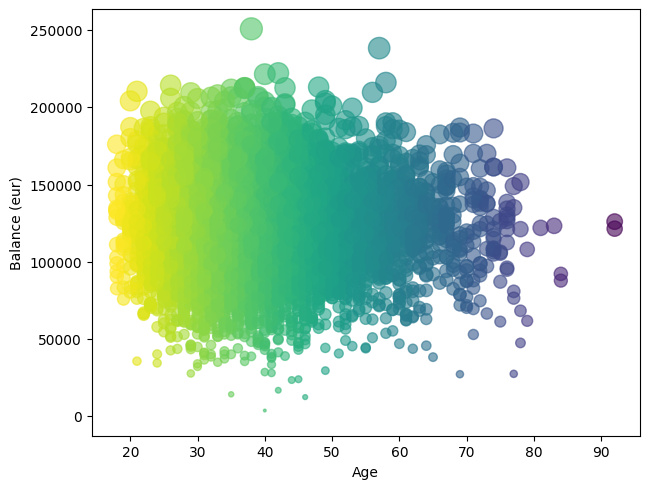

In [3]:
fig, ax = plt.subplots()
ages = bank_customers[['age']].to_numpy()
balances = bank_customers[['balance']].to_numpy()
ax.scatter(ages, balances, s=0.001*balances, c=ages*-1, alpha=0.6)
fig.tight_layout()
ax.set_ylabel('Balance (eur)')
ax.set_xlabel('Age')
plt.show()

In [4]:
duplicates = bank_customers.duplicated(subset=['customer_id'], keep=False)
print(bank_customers[duplicates]) # no duplicates.

Empty DataFrame
Columns: [customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []


In [5]:
bank_customers = bank_customers[['gender', 'credit_score', 'age', 'tenure', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']]
print(bank_customers.head())

   gender  credit_score  age  tenure  products_number  credit_card  \
0  Female           619   42       2                1            1   
1  Female           608   41       1                1            0   
2  Female           502   42       8                3            1   
3  Female           699   39       1                2            0   
4  Female           850   43       2                1            1   

   active_member  estimated_salary  churn  
0              1         101348.88      1  
1              1         112542.58      0  
2              0         113931.57      1  
3              0          93826.63      0  
4              1          79084.10      0  


In [6]:
print(bank_customers.isna().sum().sort_values()) # no empty values.

gender              0
credit_score        0
age                 0
tenure              0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [7]:
X = bank_customers[['credit_score', 'age', 'tenure', 'products_number', 'credit_card', 'active_member', 'estimated_salary']].values
#X = bank_customers[['credit_score', 'products_number', 'estimated_salary']].values
y = bank_customers[['churn']].values.ravel()
print(X.shape, y.shape)

(10000, 7) (10000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123, stratify=y)

accuracies = []
n_s = range(1,30)
for n in n_s:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    print('{} neighbors: {}'.format(n, accuracy))

1 neighbors: 0.673
2 neighbors: 0.7795
3 neighbors: 0.744
4 neighbors: 0.7865
5 neighbors: 0.769
6 neighbors: 0.791
7 neighbors: 0.7745
8 neighbors: 0.7885
9 neighbors: 0.785
10 neighbors: 0.7965
11 neighbors: 0.793
12 neighbors: 0.7995
13 neighbors: 0.7955
14 neighbors: 0.797
15 neighbors: 0.797
16 neighbors: 0.7975
17 neighbors: 0.797
18 neighbors: 0.7975
19 neighbors: 0.798
20 neighbors: 0.798
21 neighbors: 0.7995
22 neighbors: 0.7985
23 neighbors: 0.7985
24 neighbors: 0.7975
25 neighbors: 0.7975
26 neighbors: 0.797
27 neighbors: 0.796
28 neighbors: 0.797
29 neighbors: 0.7965


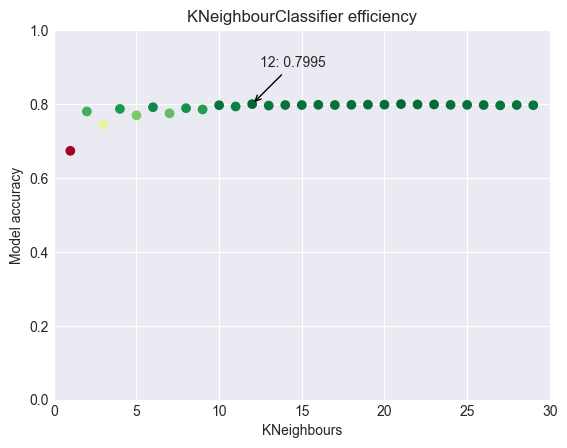

In [9]:
plt.style.use('seaborn-v0_8-dark')
fig, ax = plt.subplots()
ax.scatter(n_s, accuracies, c=accuracies, cmap=colormaps['RdYlGn'])
ax.set_title('KNeighbourClassifier efficiency')
ax.set_xlabel('KNeighbours')
ax.set_ylabel('Model accuracy')


ymax = max(accuracies)
xpos = list(accuracies).index(ymax)
xmax = n_s[xpos]

ax.annotate('{}: {}'.format(xmax, accuracies[xpos]),
            xy=(xmax, ymax),
            xytext=(xmax+0.5, ymax+0.1),
            arrowprops={'arrowstyle':'->',
                       'color':'black'}
            )
plt.grid(True)
plt.ylim([0, 1])
plt.xlim([0, len(n_s)+1])
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123, stratify=y)

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1592    1]
 [ 400    7]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.88      0.02      0.03       407

    accuracy                           0.80      2000
   macro avg       0.84      0.51      0.46      2000
weighted avg       0.81      0.80      0.71      2000



Decision Tree: 0.7905
KNN: 0.7995
Logistic Regression: 0.785


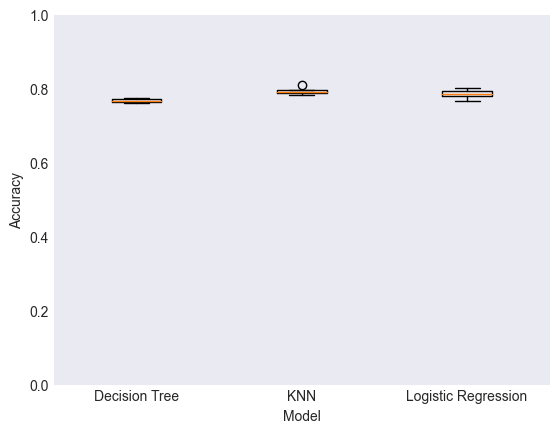

In [11]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=12),
    'Logistic Regression': LogisticRegression()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123, stratify=y)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) # In this case, scalling give worse results

results = []
for name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state=5)
    cv_result = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_result)

    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('{}: {}'.format(name, test_score))


plt.style.use('seaborn-v0_8-dark')
fig, ax = plt.subplots()
ax.boxplot(results, labels=models.keys())
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()